In [6]:
# Please include your imports in this cell
import numpy as np
#import keras
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation
from keras.layers import BatchNormalization
from keras.layers import LeakyReLU
from keras.regularizers import l2
from tensorflow.keras.optimizers import SGD ##needs to be changed to keras

from scikeras.wrappers import KerasClassifier

import imblearn
import sklearn
from  sklearn import metrics
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import validation_curve
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [22]:
X_train = np.load('Assignment2Data/X_train.npy')
y_train = np.load('Assignment2Data/y_train.npy')
X_test = np.load('Assignment2Data/X_test.npy')
y_test = np.load('Assignment2Data/y_test.npy')

In [23]:
X_train_n =  X_train/255.0
X_test_n = X_test/255.0

num_classes = 8
y_train_c = keras.utils.to_categorical(y_train, num_classes)
y_test_c = keras.utils.to_categorical(y_test, num_classes)

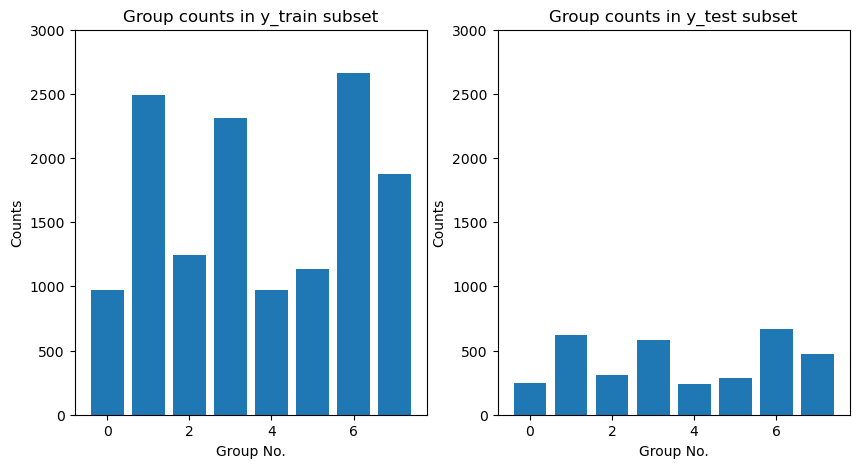

In [24]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
unique_values_1, counts_1 = np.unique(y_train, return_counts=True)
unique_values_2, counts_2 = np.unique(y_test, return_counts=True)

plt.subplot(1,2,1)
plt.bar(unique_values_1, counts_1)
plt.xlabel('Group No.')
plt.ylabel('Counts')
plt.ylim(bottom = 0, top = 3000)
plt.title('Group counts in y_train subset')

plt.subplot(1,2,2)
plt.bar(unique_values_2, counts_2)
plt.xlabel('Group No.')
plt.ylabel('Counts')
plt.title('Group counts in y_test subset')
plt.ylim(bottom = 0, top = 3000)
plt.show()

In [7]:
oversample = RandomOverSampler(sampling_strategy='minority')

In [10]:
Counter(y_train)

Counter({6: 2663, 1: 2494, 3: 2316, 7: 1878, 2: 1241, 5: 1136, 0: 974, 4: 971})

In [15]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=10000, weights=[0.99], flip_y=0)
Counter(y)

Counter({0: 9900, 1: 100})

In [11]:
X_over, y_over = oversample.fit_resample(X_train, y_train)

ValueError: Found array with dim 4. None expected <= 2.

In [19]:
class_1 = X_train[y_train==0]
len(class_1)

974

In [ ]:
##Random forest ensemble method
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier()
model.fit(x_train2,y_train)

In [25]:
X_train_r =  np.reshape(X_train, (X_train.shape[0], -1))
X_test_r = np.reshape(X_test, (X_test.shape[0], -1))

X_train_r_n =  X_train_r/255.0
X_test_r_n = X_test_r/255.0

In [26]:
from sklearn.neural_network import MLPClassifier
import warnings
warnings.filterwarnings("ignore")
mlp = MLPClassifier(max_iter=10)
parameter_space = {
    'hidden_layer_sizes': [(32,), (32,16), (128,3)],
    'activation': ['relu'],
    'solver': ['adam'],
    'alpha': [0.05],
    'learning_rate': ['constant','adaptive'],
}

from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3)
clf.fit(X_train_r_n, y_train)

# Best paramete set
print('Best parameters found:\n', clf.best_params_)

# All results
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

/Users/wtc/anaconda3/envs/tf-metal/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/wtc/anaconda3/envs/tf-metal/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/wtc/anaconda3/envs/tf-metal/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/wtc/anaconda3/envs/tf-metal/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warning

Best parameters found:
 {'activation': 'relu', 'alpha': 0.05, 'hidden_layer_sizes': (50, 100, 50), 'learning_rate': 'adaptive', 'solver': 'adam'}
0.732 (+/-0.046) for {'activation': 'relu', 'alpha': 0.05, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'constant', 'solver': 'adam'}
0.729 (+/-0.043) for {'activation': 'relu', 'alpha': 0.05, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'adaptive', 'solver': 'adam'}
0.743 (+/-0.037) for {'activation': 'relu', 'alpha': 0.05, 'hidden_layer_sizes': (50, 100, 50), 'learning_rate': 'constant', 'solver': 'adam'}
0.750 (+/-0.006) for {'activation': 'relu', 'alpha': 0.05, 'hidden_layer_sizes': (50, 100, 50), 'learning_rate': 'adaptive', 'solver': 'adam'}
0.735 (+/-0.035) for {'activation': 'relu', 'alpha': 0.05, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'solver': 'adam'}
0.741 (+/-0.012) for {'activation': 'relu', 'alpha': 0.05, 'hidden_layer_sizes': (100,), 'learning_rate': 'adaptive', 'solver': 'adam'}


In [21]:
# Use scikit-learn to grid search the batch size and epochs
import numpy as np
import tensorflow as tf
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasClassifier
# Function to create model, required for KerasClassifier
def create_model():
	# create model
	model = Sequential()
	model.add(Dense(12, input_shape=[28,28,3], activation='relu'))
	model.add(Dense(8, activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])
	return model

# create model
model = KerasClassifier(model=create_model, verbose=0)
# define the grid search parameters
batch_size = [10, 20]
epochs = [10, 20]
param_grid = dict(batch_size=batch_size, epochs=epochs)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train_n, y_train_c)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

ValueError: 
All the 12 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/wtc/anaconda3/envs/tf-metal/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/wtc/anaconda3/envs/tf-metal/lib/python3.10/site-packages/scikeras/wrappers.py", line 1491, in fit
    super().fit(X=X, y=y, sample_weight=sample_weight, **kwargs)
  File "/Users/wtc/anaconda3/envs/tf-metal/lib/python3.10/site-packages/scikeras/wrappers.py", line 760, in fit
    self._fit(
  File "/Users/wtc/anaconda3/envs/tf-metal/lib/python3.10/site-packages/scikeras/wrappers.py", line 928, in _fit
    self._fit_keras_model(
  File "/Users/wtc/anaconda3/envs/tf-metal/lib/python3.10/site-packages/scikeras/wrappers.py", line 524, in _fit_keras_model
    hist = self.model_.fit(x=X, y=y, **fit_args)
  File "/Users/wtc/anaconda3/envs/tf-metal/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/var/folders/4w/p3jk6v8j135cv56t4gzkzv3r0000gn/T/__autograph_generated_filemf5ei3g5.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "/Users/wtc/anaconda3/envs/tf-metal/lib/python3.10/site-packages/keras/src/engine/training.py", line 1338, in train_function  *
        return step_function(self, iterator)
    File "/Users/wtc/anaconda3/envs/tf-metal/lib/python3.10/site-packages/keras/src/engine/training.py", line 1322, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/wtc/anaconda3/envs/tf-metal/lib/python3.10/site-packages/keras/src/engine/training.py", line 1303, in run_step  **
        outputs = model.train_step(data)
    File "/Users/wtc/anaconda3/envs/tf-metal/lib/python3.10/site-packages/keras/src/engine/training.py", line 1081, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/Users/wtc/anaconda3/envs/tf-metal/lib/python3.10/site-packages/keras/src/engine/training.py", line 1139, in compute_loss
        return self.compiled_loss(
    File "/Users/wtc/anaconda3/envs/tf-metal/lib/python3.10/site-packages/keras/src/engine/compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/Users/wtc/anaconda3/envs/tf-metal/lib/python3.10/site-packages/keras/src/losses.py", line 142, in __call__
        losses = call_fn(y_true, y_pred)
    File "/Users/wtc/anaconda3/envs/tf-metal/lib/python3.10/site-packages/keras/src/losses.py", line 268, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/Users/wtc/anaconda3/envs/tf-metal/lib/python3.10/site-packages/keras/src/losses.py", line 2122, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "/Users/wtc/anaconda3/envs/tf-metal/lib/python3.10/site-packages/keras/src/backend.py", line 5560, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 8) and (None, 28, 28, 8) are incompatible


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/wtc/anaconda3/envs/tf-metal/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/wtc/anaconda3/envs/tf-metal/lib/python3.10/site-packages/scikeras/wrappers.py", line 1491, in fit
    super().fit(X=X, y=y, sample_weight=sample_weight, **kwargs)
  File "/Users/wtc/anaconda3/envs/tf-metal/lib/python3.10/site-packages/scikeras/wrappers.py", line 760, in fit
    self._fit(
  File "/Users/wtc/anaconda3/envs/tf-metal/lib/python3.10/site-packages/scikeras/wrappers.py", line 928, in _fit
    self._fit_keras_model(
  File "/Users/wtc/anaconda3/envs/tf-metal/lib/python3.10/site-packages/scikeras/wrappers.py", line 524, in _fit_keras_model
    hist = self.model_.fit(x=X, y=y, **fit_args)
  File "/Users/wtc/anaconda3/envs/tf-metal/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/var/folders/4w/p3jk6v8j135cv56t4gzkzv3r0000gn/T/__autograph_generated_filee168y96t.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "/Users/wtc/anaconda3/envs/tf-metal/lib/python3.10/site-packages/keras/src/engine/training.py", line 1338, in train_function  *
        return step_function(self, iterator)
    File "/Users/wtc/anaconda3/envs/tf-metal/lib/python3.10/site-packages/keras/src/engine/training.py", line 1322, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/wtc/anaconda3/envs/tf-metal/lib/python3.10/site-packages/keras/src/engine/training.py", line 1303, in run_step  **
        outputs = model.train_step(data)
    File "/Users/wtc/anaconda3/envs/tf-metal/lib/python3.10/site-packages/keras/src/engine/training.py", line 1081, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/Users/wtc/anaconda3/envs/tf-metal/lib/python3.10/site-packages/keras/src/engine/training.py", line 1139, in compute_loss
        return self.compiled_loss(
    File "/Users/wtc/anaconda3/envs/tf-metal/lib/python3.10/site-packages/keras/src/engine/compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/Users/wtc/anaconda3/envs/tf-metal/lib/python3.10/site-packages/keras/src/losses.py", line 142, in __call__
        losses = call_fn(y_true, y_pred)
    File "/Users/wtc/anaconda3/envs/tf-metal/lib/python3.10/site-packages/keras/src/losses.py", line 268, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/Users/wtc/anaconda3/envs/tf-metal/lib/python3.10/site-packages/keras/src/losses.py", line 2122, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "/Users/wtc/anaconda3/envs/tf-metal/lib/python3.10/site-packages/keras/src/backend.py", line 5560, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 8) and (None, 28, 28, 8) are incompatible


--------------------------------------------------------------------------------
2 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/wtc/anaconda3/envs/tf-metal/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/wtc/anaconda3/envs/tf-metal/lib/python3.10/site-packages/scikeras/wrappers.py", line 1491, in fit
    super().fit(X=X, y=y, sample_weight=sample_weight, **kwargs)
  File "/Users/wtc/anaconda3/envs/tf-metal/lib/python3.10/site-packages/scikeras/wrappers.py", line 760, in fit
    self._fit(
  File "/Users/wtc/anaconda3/envs/tf-metal/lib/python3.10/site-packages/scikeras/wrappers.py", line 928, in _fit
    self._fit_keras_model(
  File "/Users/wtc/anaconda3/envs/tf-metal/lib/python3.10/site-packages/scikeras/wrappers.py", line 524, in _fit_keras_model
    hist = self.model_.fit(x=X, y=y, **fit_args)
  File "/Users/wtc/anaconda3/envs/tf-metal/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/var/folders/4w/p3jk6v8j135cv56t4gzkzv3r0000gn/T/__autograph_generated_fileuncpeb_n.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "/Users/wtc/anaconda3/envs/tf-metal/lib/python3.10/site-packages/keras/src/engine/training.py", line 1338, in train_function  *
        return step_function(self, iterator)
    File "/Users/wtc/anaconda3/envs/tf-metal/lib/python3.10/site-packages/keras/src/engine/training.py", line 1322, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/wtc/anaconda3/envs/tf-metal/lib/python3.10/site-packages/keras/src/engine/training.py", line 1303, in run_step  **
        outputs = model.train_step(data)
    File "/Users/wtc/anaconda3/envs/tf-metal/lib/python3.10/site-packages/keras/src/engine/training.py", line 1081, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/Users/wtc/anaconda3/envs/tf-metal/lib/python3.10/site-packages/keras/src/engine/training.py", line 1139, in compute_loss
        return self.compiled_loss(
    File "/Users/wtc/anaconda3/envs/tf-metal/lib/python3.10/site-packages/keras/src/engine/compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/Users/wtc/anaconda3/envs/tf-metal/lib/python3.10/site-packages/keras/src/losses.py", line 142, in __call__
        losses = call_fn(y_true, y_pred)
    File "/Users/wtc/anaconda3/envs/tf-metal/lib/python3.10/site-packages/keras/src/losses.py", line 268, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/Users/wtc/anaconda3/envs/tf-metal/lib/python3.10/site-packages/keras/src/losses.py", line 2122, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "/Users/wtc/anaconda3/envs/tf-metal/lib/python3.10/site-packages/keras/src/backend.py", line 5560, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 8) and (None, 28, 28, 8) are incompatible


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/wtc/anaconda3/envs/tf-metal/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/wtc/anaconda3/envs/tf-metal/lib/python3.10/site-packages/scikeras/wrappers.py", line 1491, in fit
    super().fit(X=X, y=y, sample_weight=sample_weight, **kwargs)
  File "/Users/wtc/anaconda3/envs/tf-metal/lib/python3.10/site-packages/scikeras/wrappers.py", line 760, in fit
    self._fit(
  File "/Users/wtc/anaconda3/envs/tf-metal/lib/python3.10/site-packages/scikeras/wrappers.py", line 928, in _fit
    self._fit_keras_model(
  File "/Users/wtc/anaconda3/envs/tf-metal/lib/python3.10/site-packages/scikeras/wrappers.py", line 524, in _fit_keras_model
    hist = self.model_.fit(x=X, y=y, **fit_args)
  File "/Users/wtc/anaconda3/envs/tf-metal/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/var/folders/4w/p3jk6v8j135cv56t4gzkzv3r0000gn/T/__autograph_generated_fileuq0c4ggh.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "/Users/wtc/anaconda3/envs/tf-metal/lib/python3.10/site-packages/keras/src/engine/training.py", line 1338, in train_function  *
        return step_function(self, iterator)
    File "/Users/wtc/anaconda3/envs/tf-metal/lib/python3.10/site-packages/keras/src/engine/training.py", line 1322, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/wtc/anaconda3/envs/tf-metal/lib/python3.10/site-packages/keras/src/engine/training.py", line 1303, in run_step  **
        outputs = model.train_step(data)
    File "/Users/wtc/anaconda3/envs/tf-metal/lib/python3.10/site-packages/keras/src/engine/training.py", line 1081, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/Users/wtc/anaconda3/envs/tf-metal/lib/python3.10/site-packages/keras/src/engine/training.py", line 1139, in compute_loss
        return self.compiled_loss(
    File "/Users/wtc/anaconda3/envs/tf-metal/lib/python3.10/site-packages/keras/src/engine/compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/Users/wtc/anaconda3/envs/tf-metal/lib/python3.10/site-packages/keras/src/losses.py", line 142, in __call__
        losses = call_fn(y_true, y_pred)
    File "/Users/wtc/anaconda3/envs/tf-metal/lib/python3.10/site-packages/keras/src/losses.py", line 268, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/Users/wtc/anaconda3/envs/tf-metal/lib/python3.10/site-packages/keras/src/losses.py", line 2122, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "/Users/wtc/anaconda3/envs/tf-metal/lib/python3.10/site-packages/keras/src/backend.py", line 5560, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 8) and (None, 28, 28, 8) are incompatible


--------------------------------------------------------------------------------
2 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/wtc/anaconda3/envs/tf-metal/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/wtc/anaconda3/envs/tf-metal/lib/python3.10/site-packages/scikeras/wrappers.py", line 1491, in fit
    super().fit(X=X, y=y, sample_weight=sample_weight, **kwargs)
  File "/Users/wtc/anaconda3/envs/tf-metal/lib/python3.10/site-packages/scikeras/wrappers.py", line 760, in fit
    self._fit(
  File "/Users/wtc/anaconda3/envs/tf-metal/lib/python3.10/site-packages/scikeras/wrappers.py", line 928, in _fit
    self._fit_keras_model(
  File "/Users/wtc/anaconda3/envs/tf-metal/lib/python3.10/site-packages/scikeras/wrappers.py", line 524, in _fit_keras_model
    hist = self.model_.fit(x=X, y=y, **fit_args)
  File "/Users/wtc/anaconda3/envs/tf-metal/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/var/folders/4w/p3jk6v8j135cv56t4gzkzv3r0000gn/T/__autograph_generated_filei1ufkfiy.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "/Users/wtc/anaconda3/envs/tf-metal/lib/python3.10/site-packages/keras/src/engine/training.py", line 1338, in train_function  *
        return step_function(self, iterator)
    File "/Users/wtc/anaconda3/envs/tf-metal/lib/python3.10/site-packages/keras/src/engine/training.py", line 1322, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/wtc/anaconda3/envs/tf-metal/lib/python3.10/site-packages/keras/src/engine/training.py", line 1303, in run_step  **
        outputs = model.train_step(data)
    File "/Users/wtc/anaconda3/envs/tf-metal/lib/python3.10/site-packages/keras/src/engine/training.py", line 1081, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/Users/wtc/anaconda3/envs/tf-metal/lib/python3.10/site-packages/keras/src/engine/training.py", line 1139, in compute_loss
        return self.compiled_loss(
    File "/Users/wtc/anaconda3/envs/tf-metal/lib/python3.10/site-packages/keras/src/engine/compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/Users/wtc/anaconda3/envs/tf-metal/lib/python3.10/site-packages/keras/src/losses.py", line 142, in __call__
        losses = call_fn(y_true, y_pred)
    File "/Users/wtc/anaconda3/envs/tf-metal/lib/python3.10/site-packages/keras/src/losses.py", line 268, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/Users/wtc/anaconda3/envs/tf-metal/lib/python3.10/site-packages/keras/src/losses.py", line 2122, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "/Users/wtc/anaconda3/envs/tf-metal/lib/python3.10/site-packages/keras/src/backend.py", line 5560, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 8) and (None, 28, 28, 8) are incompatible


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/wtc/anaconda3/envs/tf-metal/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/wtc/anaconda3/envs/tf-metal/lib/python3.10/site-packages/scikeras/wrappers.py", line 1491, in fit
    super().fit(X=X, y=y, sample_weight=sample_weight, **kwargs)
  File "/Users/wtc/anaconda3/envs/tf-metal/lib/python3.10/site-packages/scikeras/wrappers.py", line 760, in fit
    self._fit(
  File "/Users/wtc/anaconda3/envs/tf-metal/lib/python3.10/site-packages/scikeras/wrappers.py", line 928, in _fit
    self._fit_keras_model(
  File "/Users/wtc/anaconda3/envs/tf-metal/lib/python3.10/site-packages/scikeras/wrappers.py", line 524, in _fit_keras_model
    hist = self.model_.fit(x=X, y=y, **fit_args)
  File "/Users/wtc/anaconda3/envs/tf-metal/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/var/folders/4w/p3jk6v8j135cv56t4gzkzv3r0000gn/T/__autograph_generated_file7tumjq1w.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "/Users/wtc/anaconda3/envs/tf-metal/lib/python3.10/site-packages/keras/src/engine/training.py", line 1338, in train_function  *
        return step_function(self, iterator)
    File "/Users/wtc/anaconda3/envs/tf-metal/lib/python3.10/site-packages/keras/src/engine/training.py", line 1322, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/wtc/anaconda3/envs/tf-metal/lib/python3.10/site-packages/keras/src/engine/training.py", line 1303, in run_step  **
        outputs = model.train_step(data)
    File "/Users/wtc/anaconda3/envs/tf-metal/lib/python3.10/site-packages/keras/src/engine/training.py", line 1081, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/Users/wtc/anaconda3/envs/tf-metal/lib/python3.10/site-packages/keras/src/engine/training.py", line 1139, in compute_loss
        return self.compiled_loss(
    File "/Users/wtc/anaconda3/envs/tf-metal/lib/python3.10/site-packages/keras/src/engine/compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/Users/wtc/anaconda3/envs/tf-metal/lib/python3.10/site-packages/keras/src/losses.py", line 142, in __call__
        losses = call_fn(y_true, y_pred)
    File "/Users/wtc/anaconda3/envs/tf-metal/lib/python3.10/site-packages/keras/src/losses.py", line 268, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/Users/wtc/anaconda3/envs/tf-metal/lib/python3.10/site-packages/keras/src/losses.py", line 2122, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "/Users/wtc/anaconda3/envs/tf-metal/lib/python3.10/site-packages/keras/src/backend.py", line 5560, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 8) and (None, 28, 28, 8) are incompatible


--------------------------------------------------------------------------------
2 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/wtc/anaconda3/envs/tf-metal/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/wtc/anaconda3/envs/tf-metal/lib/python3.10/site-packages/scikeras/wrappers.py", line 1491, in fit
    super().fit(X=X, y=y, sample_weight=sample_weight, **kwargs)
  File "/Users/wtc/anaconda3/envs/tf-metal/lib/python3.10/site-packages/scikeras/wrappers.py", line 760, in fit
    self._fit(
  File "/Users/wtc/anaconda3/envs/tf-metal/lib/python3.10/site-packages/scikeras/wrappers.py", line 928, in _fit
    self._fit_keras_model(
  File "/Users/wtc/anaconda3/envs/tf-metal/lib/python3.10/site-packages/scikeras/wrappers.py", line 524, in _fit_keras_model
    hist = self.model_.fit(x=X, y=y, **fit_args)
  File "/Users/wtc/anaconda3/envs/tf-metal/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/var/folders/4w/p3jk6v8j135cv56t4gzkzv3r0000gn/T/__autograph_generated_fileskpy5br1.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "/Users/wtc/anaconda3/envs/tf-metal/lib/python3.10/site-packages/keras/src/engine/training.py", line 1338, in train_function  *
        return step_function(self, iterator)
    File "/Users/wtc/anaconda3/envs/tf-metal/lib/python3.10/site-packages/keras/src/engine/training.py", line 1322, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/wtc/anaconda3/envs/tf-metal/lib/python3.10/site-packages/keras/src/engine/training.py", line 1303, in run_step  **
        outputs = model.train_step(data)
    File "/Users/wtc/anaconda3/envs/tf-metal/lib/python3.10/site-packages/keras/src/engine/training.py", line 1081, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/Users/wtc/anaconda3/envs/tf-metal/lib/python3.10/site-packages/keras/src/engine/training.py", line 1139, in compute_loss
        return self.compiled_loss(
    File "/Users/wtc/anaconda3/envs/tf-metal/lib/python3.10/site-packages/keras/src/engine/compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/Users/wtc/anaconda3/envs/tf-metal/lib/python3.10/site-packages/keras/src/losses.py", line 142, in __call__
        losses = call_fn(y_true, y_pred)
    File "/Users/wtc/anaconda3/envs/tf-metal/lib/python3.10/site-packages/keras/src/losses.py", line 268, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/Users/wtc/anaconda3/envs/tf-metal/lib/python3.10/site-packages/keras/src/losses.py", line 2122, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "/Users/wtc/anaconda3/envs/tf-metal/lib/python3.10/site-packages/keras/src/backend.py", line 5560, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 8) and (None, 28, 28, 8) are incompatible


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/wtc/anaconda3/envs/tf-metal/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/wtc/anaconda3/envs/tf-metal/lib/python3.10/site-packages/scikeras/wrappers.py", line 1491, in fit
    super().fit(X=X, y=y, sample_weight=sample_weight, **kwargs)
  File "/Users/wtc/anaconda3/envs/tf-metal/lib/python3.10/site-packages/scikeras/wrappers.py", line 760, in fit
    self._fit(
  File "/Users/wtc/anaconda3/envs/tf-metal/lib/python3.10/site-packages/scikeras/wrappers.py", line 928, in _fit
    self._fit_keras_model(
  File "/Users/wtc/anaconda3/envs/tf-metal/lib/python3.10/site-packages/scikeras/wrappers.py", line 524, in _fit_keras_model
    hist = self.model_.fit(x=X, y=y, **fit_args)
  File "/Users/wtc/anaconda3/envs/tf-metal/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/var/folders/4w/p3jk6v8j135cv56t4gzkzv3r0000gn/T/__autograph_generated_filejxk2y29r.py", line 15, in tf__train_function
    retval_ = ag__.converted_call(ag__.ld(step_function), (ag__.ld(self), ag__.ld(iterator)), None, fscope)
ValueError: in user code:

    File "/Users/wtc/anaconda3/envs/tf-metal/lib/python3.10/site-packages/keras/src/engine/training.py", line 1338, in train_function  *
        return step_function(self, iterator)
    File "/Users/wtc/anaconda3/envs/tf-metal/lib/python3.10/site-packages/keras/src/engine/training.py", line 1322, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/wtc/anaconda3/envs/tf-metal/lib/python3.10/site-packages/keras/src/engine/training.py", line 1303, in run_step  **
        outputs = model.train_step(data)
    File "/Users/wtc/anaconda3/envs/tf-metal/lib/python3.10/site-packages/keras/src/engine/training.py", line 1081, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/Users/wtc/anaconda3/envs/tf-metal/lib/python3.10/site-packages/keras/src/engine/training.py", line 1139, in compute_loss
        return self.compiled_loss(
    File "/Users/wtc/anaconda3/envs/tf-metal/lib/python3.10/site-packages/keras/src/engine/compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/Users/wtc/anaconda3/envs/tf-metal/lib/python3.10/site-packages/keras/src/losses.py", line 142, in __call__
        losses = call_fn(y_true, y_pred)
    File "/Users/wtc/anaconda3/envs/tf-metal/lib/python3.10/site-packages/keras/src/losses.py", line 268, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/Users/wtc/anaconda3/envs/tf-metal/lib/python3.10/site-packages/keras/src/losses.py", line 2122, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "/Users/wtc/anaconda3/envs/tf-metal/lib/python3.10/site-packages/keras/src/backend.py", line 5560, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 8) and (None, 28, 28, 8) are incompatible

